# Neutrino Oscillation- Three Flavour Animation

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from vpython import sphere, cylinder, color, rate, vector, canvas, arrow, box, label
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import tkinter as tk
from IPython.display import Image # needed to import a remote image later

<IPython.core.display.Javascript object>

In [2]:
# mixing factors (converted from degrees to radians)
th12 = np.radians(33.82)
th23 = np.radians(48.3)
th13 = np.radians(8.61)
delta_CP = np.radians(222)
#delta_CP = 0

# mass differences
dm21_sq = 7.39*10**(-5) # eV^2
dm31_sq = 2.523*10**(-3) # eV^2

# mass eigenstates
m1 = 0.01 # eV
m2 = np.sqrt(m1*m1 + dm21_sq) # eV
m3 = np.sqrt(m1*m1 + dm31_sq) # eV 

# total mass 
mtot = m1 + m2 + m3 #eV
assert mtot < 0.23, "Error: total mass not in agreement with experimental bounds"

# calculate third mass difference squared
dm32_sq = m3*m3 - m2*m2 # eV^2

# set energy values
E_sun_pp = 4*10**5 # eV 
E_atm = 10**11 # eV
E_acc = 10**9 #eV

# important constants:

# speed of light
c = 299792.458 # km s^-1 

# Planck constant
hbar = 6.582119569*10**(-16) # eV*s

# Astronomical unit (i.e. the distance between the Sun and the Earth)
AU = 149597870.700 # km

In [3]:
#Time Dependence(hbar set to 1)
t=np.linspace(0,50,1000)
E1=2
E2=5
E3=5.1
E_3f = np.array([E1, E2, E3])
theta=0.5

In [4]:
###TRANSFORMATION MATRIX###



u_atm=np.array([[1,0,0],[0,np.cos(th23),np.sin(th23)],[0,-np.sin(th23),np.cos(th23)]])#Atmospheric Contribution
u_cross=np.array([[np.cos(th13),0,np.sin(th13)*np.exp(complex(0,delta_CP))],[0,1,0],[-np.sin(th13)*np.exp(complex(0,delta_CP)),0,np.cos(th13)]])#Cross mixing matrix
u_solar=np.array([[np.cos(th12),np.sin(th12),0],[-np.sin(th12),np.cos(th12),0],[0,0,1]])#Solar contribution

cs=u_cross.dot(u_solar)#cross x solar matrix multiplication

U_tot=u_atm.dot(cs)# Full transformation matrix



vt1=np.array([[1],[0],[0]])#mass1 basis vector
vt2=np.array([[0],[1],[0]])#mass2 basis vector
vt3=np.array([[0],[0],[1]])#mass3 basis vector

Vfull=np.array([[vt1],[vt2],[vt3]])#Vector of basis vectors 

v_3f= U_tot.dot(Vfull)#Transforming Mass Basis to Flavour Basis

v3r= v_3f.real# real part of flavour vectors
#print(v3r)
###Time Dependence###
E3=5.1
VT1=(np.array([[1],[0],[0]]))*np.exp(complex(0,-E1*t[0]))#mass1 basis vector
VT2=np.array([[0],[1],[0]])*np.exp(complex(0,-E2*t[0]))#mass2 basis vector
VT3=np.array([[0],[0],[1]])*np.exp(complex(0,-E3*t[0]))#mass3 basis vector

VFULL=np.array([[VT1],[VT2],[VT3]])#Vector of basis vectors 

VTF=U_tot.dot(VFULL)#Time Dependent Transformation
VTFR= VTF.real

<IPython.core.display.Javascript object>


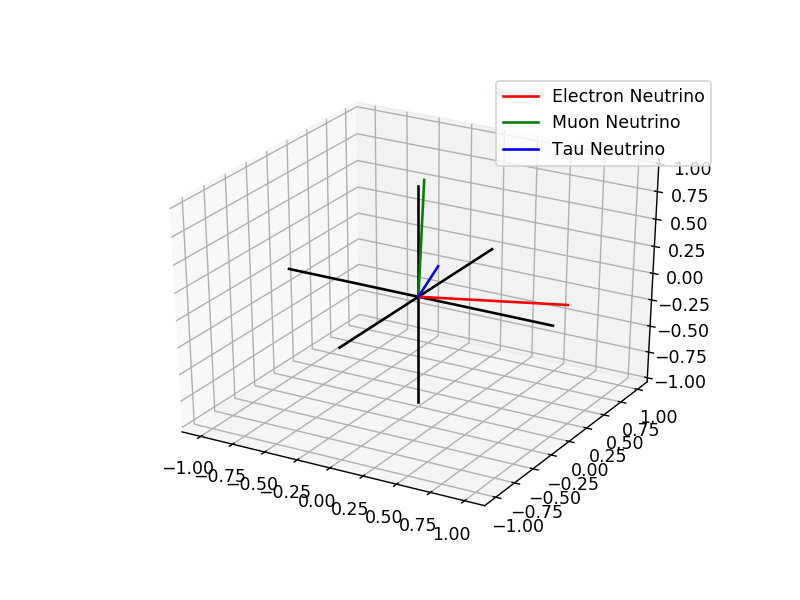

In [5]:
###PLOTTING BASES AND FLAVOUR VECTORS###

fig=plt.figure()
ax= fig.gca(projection='3d')
ax.plot(xs=[-1,1],ys=[0,0],zs=[0,0], color='k')
ax.plot(xs=[0,0],ys=[1,-1],zs=[0,0],color='k')
ax.plot(xs=[0,0],ys=[0,0],zs=[1,-1],color='k')

#Electron Neutrino coordinates
x1=([0,v3r[0,0,0,0]])
y1=([0,v3r[0,1,0,0]])
z1=([0,v3r[0,2,0,0]])

#Muon Neutrino Coordinates
x2=([0,v3r[1,0,0,0]])
y2=([0,v3r[1,1,0,0]])
z2=([0,v3r[1,2,0,0]])

#Tau Neutrino Coordinates
x3=([0,v3r[2,0,0,0]])
y3=([0,v3r[2,1,0,0]])
z3=([0,v3r[2,2,0,0]])

ax.plot(xs=x1,ys=y1,zs=z1,color='r',label='Electron Neutrino')
ax.plot(xs=x2,ys=y2,zs=z2,color='g',label='Muon Neutrino')
ax.plot(xs=x3,ys=y3,zs=z3,color='b',label='Tau Neutrino')
plt.legend()

In [13]:
# mass eigenstates vector
mar_3f = np.array([m1, m2, m3]) 
E_3f = np.array([E1, E2, E3])
#rotational matrix
U1 = np.array([[1, 0, 0], [0, np.cos(th23), np.sin(th23)], [0, -np.sin(th23), np.cos(th23)]]) #first matrix
U2 = np.array([[np.cos(th13), 0, np.sin(th13)*np.exp(-1j*delta_CP)], [0, 1, 0], 
               [-np.sin(th13)*np.exp(1j*delta_CP), 0, np.cos(th13)]]) #second matrix
U3 = np.array([[np.cos(th12), np.sin(th12), 0], [-np.sin(th12), np.cos(th12), 0], [0, 0, 1]]) #third matrix
rot_mat_3f = np.dot(U1, np.dot(U2, U3)) #final matrix


# check that the 3x3 matrix is unitary
herm = np.transpose(np.conjugate(rot_mat_3f))


In [7]:
E1=2
E2=5
E3=5.1
E_3f = np.array([E1, E2, E3])
def full_prob(t, E, alpha):
    """Calculates the probability of a neutrino of flavour alpha to remain of that same flavour or to change into another
    flavour
    Takes as inputs the distance L (in kilometers), the energy at which the neutrino is created E (in eV), 
    and the initial flavour alpha ("electron", "muon", or "tau")
    Returns an array with three elements respectively representing the probability of the neutrino being an electron, muon
    or tau neutrino"""
    
    # transform from string to integer
    if alpha == "electron":
        a = 0
    elif alpha == "muon":
        a = 1
    elif alpha == "tau":
        a = 2
    else:
        print('Error: choose from "electron", "muon" or "tau"')
        
    # calculate X_{ij} (argument of sine squared)
    X = np.zeros((3, 3)) #store
    for i in range(3):
        for j in range(3):
            X[i, j] = (E[i] - E[j])*t/2
        
    # calculate probabilities
    U = rot_mat_3f 
    vals = np.zeros(3) #store
    for b in range(3): 
        sum_re_parts = 0
        sum_im_parts = 0
        for i in range(3):
                for j in range(i):
                    term = np.conj(U[a, i])*U[b, i]*U[a, j]*np.conj(U[b, j])
                    re_part = np.real(term)*np.sin(X[i,j])*np.sin(X[i,j])
                    im_part = np.imag(term)*np.sin(2*X[i,j])
                    sum_re_parts += re_part
                    sum_im_parts += im_part
        if b == a:
            vals[b] = 1 - 4*sum_re_parts + 2*sum_im_parts
        else:
            vals[b] = - 4*sum_re_parts + 2*sum_im_parts
            
    return vals

# test
arp = [full_prob(AU, E_3f, i)*100 for i in ["electron", "muon", "tau"]]
print(arp)
print(np.sum(arp[0]), np.sum(arp[1]), np.sum(arp[2]))

[array([68.94579213,  9.90651543, 21.14769243]), array([1.17069579e+01, 8.82278822e+01, 6.51599280e-02]), array([19.34725   ,  1.86560236, 78.78714764])]
99.99999999999997 99.99999999999997 100.0


In [8]:
def E_3(E1,E2,E3):
    scene= canvas(background=color.white)
    E_3f = np.array([E1, E2, E3])
    # first set up the objects:
    pivot1 = vector(-1,0,0) # pivot point at centre of display
    
    VT1=(np.array([[1],[0],[0]]))*np.exp(complex(0,-E1*t[0]))#mass1 basis vector
    VT2=np.array([[0],[1],[0]])*np.exp(complex(0,-E2*t[0]))#mass2 basis vector
    VT3=np.array([[0],[0],[1]])*np.exp(complex(0,-E3*t[0]))#mass3 basis vector

    VFULL=np.array([[VT1],[VT2],[VT3]])#Vector of basis vectors 

    VTF=U_tot.dot(VFULL)#Time Dependent Transformation
    VTFR= VTF.real

    # ...and the bob.
    e_neutrino2 = sphere(pos=vector(VTFR[0,0,0,0],VTFR[0,1,0,0],VTFR[0,2,0,0]), 
                      radius = 0.1, color=color.white, make_trail=True, retain=20)
    scene.camera.pos=vector(1.5,0.5,1.73205)
    scene.camera.axis=-scene.camera.pos
    space= box(pos=vector(-3,0,-3),axis=vector(-1.73205,0,1.5),length=250,width=1,height=30,texture="space.jpg.png")
    N=300
    # Loop for electron neutrino 
    for i in range(0,N):
    
   
        ## first system:
        VT1=(np.array([[1],[0],[0]]))*np.exp(complex(0,-E1*t[i]))#mass1 basis vector
        VT2=np.array([[0],[1],[0]])*np.exp(complex(0,-E2*t[i]))#mass2 basis vector
        VT3=np.array([[0],[0],[1]])*np.exp(complex(0,-E3*t[i]))#mass3 basis vector

        VFULL=np.array([[VT1],[VT2],[VT3]])#Vector of basis vectors 

        VTF=U_tot.dot(VFULL)#Time Dependent Transformation
        VTFR= VTF.real
    
        xpos=VTFR[0,0,0,0]
        ypos=VTFR[0,1,0,0]
        zpos=VTFR[0,2,0,0]
    
        e_neutrino2.pos= vector(xpos,ypos,zpos)
        space.pos=vector(-3+5*t[i],0,-3-5*t[i])
        #axes
        rod = cylinder(pos=pivot1, axis = vector(2,0,0), 
                      radius = 0.01, color=color.blue)
        rod = cylinder(pos=vector(0,-1,0), axis = vector(0,2,0), 
                      radius = 0.01, color=color.blue)
        rod = cylinder(pos=vector(0,0,-1), axis = vector(0,0,2), 
                      radius = 0.01, color=color.blue)
        rod = cylinder(pos=vector(-0.1,np.sin(theta),0), axis = vector(0.2,0,0), 
                      radius = 0.01, color=color.blue)
        rod = cylinder(pos=vector(-0.1,-np.sin(theta),0), axis = vector(0.2,0,0), 
                      radius = 0.01, color=color.blue)
        label(pos=vector(1,0,0), text='M1')
        label(pos=vector(0,1,0), text='M2')
        label(pos=vector(0,0,1), text='M3')

                   
        #Pem=((np.sin(2*theta))**2)*np.sin((E1-E2)*t[i]/2)#Probability that an electron neutrino turns into a muon neutrino
        #Pet=((np.sin(2*theta))**2)*np.sin((E1-E3)*t[i]/2)#Probability that an electron neutrino turns into a tau neutrino
        #e_neutrino2.color= vector(1-abs(Pem)-abs(Pet),abs(Pem),abs(Pet))#red= probability of not transforming. Redder= more likely to remain an electron neutrino.
        prob=full_prob(t[i],E_3f,"electron")
        pee=prob[0]
        pem=prob[1]
        pet=prob[2]
        e_neutrino2.color= vector(pee,pem,pet)
   
        rate(8) # max number of screen updates per second
        #print(bob.color)

In [18]:
def M_3(E1,E2,E3):

    scene= canvas(background=color.white)
    E_3f = np.array([E1, E2, E3])
    # first set up the objects:
    pivot1 = vector(-1,0,0) # pivot point at centre of display
    
    E3=5.1
    VT1=(np.array([[1],[0],[0]]))*np.exp(complex(0,-E1*t[0]))#mass1 basis vector
    VT2=np.array([[0],[1],[0]])*np.exp(complex(0,-E2*t[0]))#mass2 basis vector
    VT3=np.array([[0],[0],[1]])*np.exp(complex(0,-E3*t[0]))#mass3 basis vector

    VFULL=np.array([[VT1],[VT2],[VT3]])#Vector of basis vectors 

    VTF=U_tot.dot(VFULL)#Time Dependent Transformation
    VTFR= VTF.real

    # ...and the bob.
    m_neutrino2 = sphere(pos=vector(VTFR[1,0,0,0],VTFR[1,1,0,0],VTFR[1,2,0,0]), 
                      radius = 0.1, color=color.white, make_trail=True, retain=20)
    space= box(pos=vector(-3,0,-3),axis=vector(-1.73205,0,1.5),length=250,width=1,height=30,texture="space.jpg.png")
    scene.camera.pos=vector(1.5,0.5,1.73205)
    scene.camera.axis=-scene.camera.pos
    N=300
    # Loop for electron neutrino 
    for i in range(0,N):
    
   
        ## first system:
        VT1=(np.array([[1],[0],[0]]))*np.exp(complex(0,-E1*t[i]))#mass1 basis vector
        VT2=np.array([[0],[1],[0]])*np.exp(complex(0,-E2*t[i]))#mass2 basis vector
        VT3=np.array([[0],[0],[1]])*np.exp(complex(0,-E3*t[i]))#mass3 basis vector

        VFULL=np.array([[VT1],[VT2],[VT3]])#Vector of basis vectors 

        VTF=U_tot.dot(VFULL)#Time Dependent Transformation
        VTFR= VTF.real
    
        xpos=VTFR[1,0,0,0]
        ypos=VTFR[1,1,0,0]
        zpos=VTFR[1,2,0,0]
    
        m_neutrino2.pos= vector(xpos,ypos,zpos)
        space.pos=vector(-3+5*t[i],0,-3-5*t[i])
    
        #axes
        rod = cylinder(pos=pivot1, axis = vector(2,0,0), 
                      radius = 0.01, color=color.blue)
        rod = cylinder(pos=vector(0,-1,0), axis = vector(0,2,0), 
                      radius = 0.01, color=color.blue)
        rod = cylinder(pos=vector(0,0,-1), axis = vector(0,0,2), 
                      radius = 0.01, color=color.blue)
        rod = cylinder(pos=vector(-0.1,np.sin(theta),0), axis = vector(0.2,0,0), 
                      radius = 0.01, color=color.blue)
        rod = cylinder(pos=vector(-0.1,-np.sin(theta),0), axis = vector(0.2,0,0),
                      radius = 0.01, color=color.blue)
        label(pos=vector(1,0,0), text='M1')
        label(pos=vector(0,1,0), text='M2')
        label(pos=vector(0,0,1), text='M3')
    

                   
        #Pme=((np.sin(2*theta))**2)*np.sin((E2-E1)*t[i]/2)#Probability that an electron neutrino turns into a muon neutrino
        #Pmt=((np.sin(2*theta))**2)*np.sin((E2-E3)*t[i]/2)
        #m_neutrino2.color= vector(abs(Pme),1-abs(Pme)-abs(Pmt),abs(Pmt))#red= probability of not transforming. Redder= more likely to remain an electron neutrino.
        prob=full_prob(t[i],E_3f,"muon")
        pee=prob[0]
        pem=prob[1]
        pet=prob[2]
        m_neutrino2.color= vector(pee,pem,pet)
   
        rate(8) # max number of screen updates per second
        #print(bob.color)

In [22]:
def T_3(E1, E2, E3):

    scene= canvas(background=color.white)
    E_3f = np.array([E1, E2, E3])
    # first set up the objects:
    pivot1 = vector(-1,0,0) # pivot point at centre of display
    E3=5.1
    VT1=(np.array([[1],[0],[0]]))*np.exp(complex(0,-E1*t[0]))#mass1 basis vector
    VT2=np.array([[0],[1],[0]])*np.exp(complex(0,-E2*t[0]))#mass2 basis vector
    VT3=np.array([[0],[0],[1]])*np.exp(complex(0,-E3*t[0]))#mass3 basis vector

    VFULL=np.array([[VT1],[VT2],[VT3]])#Vector of basis vectors 

    VTF=U_tot.dot(VFULL)#Time Dependent Transformation
    VTFR= VTF.real

    # ...and the bob.
    t_neutrino2 = sphere(pos=vector(VTFR[2,0,0,0],VTFR[2,1,0,0],VTFR[2,2,0,0]), 
                      radius = 0.1, color=color.white, make_trail=True, retain=20)
    space= box(pos=vector(-3,0,-3),axis=vector(-1.73205,0,1.5),length=250,width=1,height=30,texture="space.jpg.png")
    scene.camera.pos=vector(1.5,0.5,1.73205)
    scene.camera.axis=-scene.camera.pos
    N=300
    # Loop for electron neutrino 
    for i in range(0,N):
    
   
        ## first system:
        VT1=(np.array([[1],[0],[0]]))*np.exp(complex(0,-E1*t[i]))#mass1 basis vector
        VT2=np.array([[0],[1],[0]])*np.exp(complex(0,-E2*t[i]))#mass2 basis vector
        VT3=np.array([[0],[0],[1]])*np.exp(complex(0,-E3*t[i]))#mass3 basis vector

        VFULL=np.array([[VT1],[VT2],[VT3]])#Vector of basis vectors 

        VTF=U_tot.dot(VFULL)#Time Dependent Transformation
        VTFR= VTF.real
    
        xpos=VTFR[2,0,0,0]
        ypos=VTFR[2,1,0,0]
        zpos=VTFR[2,2,0,0]
    
        t_neutrino2.pos= vector(xpos,ypos,zpos)
        space.pos=vector(-3+5*t[i],0,-3-5*t[i])
    
        #axes
        rod = cylinder(pos=pivot1, axis = vector(2,0,0), 
                      radius = 0.01, color=color.blue)
        rod = cylinder(pos=vector(0,-1,0), axis = vector(0,2,0), 
                      radius = 0.01, color=color.blue)
        rod = cylinder(pos=vector(0,0,-1), axis = vector(0,0,2), 
                      radius = 0.01, color=color.blue)
        rod = cylinder(pos=vector(-0.1,np.sin(theta),0), axis = vector(0.2,0,0), 
                      radius = 0.01, color=color.blue)
        rod = cylinder(pos=vector(-0.1,-np.sin(theta),0), axis = vector(0.2,0,0), 
                      radius = 0.01, color=color.blue)
        label(pos=vector(1,0,0), text='M1')
        label(pos=vector(0,1,0), text='M2')
        label(pos=vector(0,0,1), text='M3')
    

                   
        #Pte=((np.sin(2*theta))**2)*np.sin((E3-E1)*t[i]/2)#Probability that an electron neutrino turns into a muon neutrino
        #Ptm=((np.sin(2*theta))**2)*np.sin((E3-E2)*t[i]/2)#Probability that an electron neutrino turns into a muon neutrino
        #t_neutrino2.color= vector(abs(Pte),abs(Ptm),1-abs(Pte)-abs(Ptm))#red= probability of not transforming. Redder= more likely to remain an electron neutrino.
        prob=full_prob(t[i],E_3f,"tau")
        pee=prob[0]
        pem=prob[1]
        pet=prob[2]
        t_neutrino2.color= vector(pee,pem,pet)
   
        rate(8) # max number of screen updates per second
        #print(bob.color)

In [25]:
E1= float(input("Input Mass 1 energy(in range1-10)"))
E2= float(input("Input Mass 2 energy(in range 1-10)"))
E3= float(input("Input Mass 3 energy(in range 1-10)"))
f= (input("Input flavour:"))
if f in ['e','E','electron','Electron']:
    print("Initially electron neutrino" )
    E_3(E1,E2,E3)
if f in ['m','M','Mu','MU','mu','Muon','muon'] :
    print("Initially muon neutrino" )
    M_3(E1,E2,E3)
if f in ['t','T','Tau','TAU','tau'] :
    print("Initially tau neutrino" )
    T_3(E1,E2,E3)
else:
        print('End')

Input Mass 1 energy(in range1-10)3
Input Mass 2 energy(in range 1-10)7
Input Mass 3 energy(in range 1-10)2
Input flavour:t
Initially tau neutrino


<IPython.core.display.Javascript object>